In [1]:
import pandas as pd
import random
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import seaborn as sns
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

num_classes = 2
#resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg'))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [2]:
folders = ['PNEUMONIA', 'NORMAL']
sizeofImg = 150
def import_data(img_files):
    itr_data = [] 
    for folder in folders: 
        fold_path = os.path.join(img_files, folder)
        fold_no = folders.index(folder)
        for imgages in os.listdir(fold_path):
            try:
                itr_img = cv2.imread(os.path.join(fold_path, imgages), cv2.IMREAD_GRAYSCALE)
                itr_resized = cv2.resize(itr_img, (sizeofImg, sizeofImg))
                itr_data.append([itr_resized, fold_no])
            except Exception as e:
                print(e)
    return np.array(itr_data)

In [3]:
test_data = import_data('C:/Users/ramna/DataScience/CourseWork/ANN/test')
train_data = import_data('C:/Users/ramna/DataScience/CourseWork/ANN/train')
val_data = import_data('C:/Users/ramna/DataScience/CourseWork/ANN/val')

C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


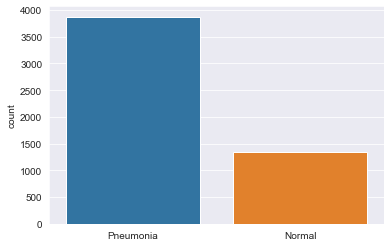

In [4]:
display_data = []
for i_itr in train_data:
    if(i_itr[1] == 0):
        display_data.append("Pneumonia")
    else:
        display_data.append("Normal")
sns.set_style('darkgrid')
sns.countplot(display_data)

In [5]:
image_size = 150
nb_train_samples = 5216 # number of files in training set
batch_size = 16

EPOCHS = 6
STEPS = nb_train_samples / batch_size

## Specify the values for all arguments to data_generator_with_aug.
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                             horizontal_flip = True,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2
                                            )
            
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input            
                                          )

train_generator = data_generator_with_aug.flow_from_directory(
       directory = 'C:/Users/ramna/DataScience/CourseWork/ANN/train/',
       target_size = (image_size, image_size),
       batch_size = batch_size,
       class_mode = 'categorical')

validation_generator = data_generator_no_aug.flow_from_directory(
       directory = 'C:/Users/ramna/DataScience/CourseWork/ANN/val/',
       target_size = (image_size, image_size),
       class_mode = 'categorical')

test_generator = data_generator_no_aug.flow_from_directory(
       directory = 'C:/Users/ramna/DataScience/CourseWork/ANN/test/',
       target_size = (image_size, image_size),
       batch_size = batch_size,
       class_mode = 'categorical')

model.fit_generator(
       train_generator, # specify where model gets training data
       epochs = EPOCHS,
       steps_per_epoch=STEPS,
       validation_data=validation_generator) # specify where model gets validation data

# Evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Program Files (x86)\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
326/326 [==============================] - 952s 3s/step - loss: 0.5900 - accuracy: 0.8579 - val_loss: 1.4046 - val_accuracy: 0.6875
Epoch 2/6
326/326 [==============================] - 867s 3s/step - loss: 0.2057 - accuracy: 0.9299 - val_loss: 0.6295 - val_accuracy: 0.6875
Epoch 3/6
326/326 [==============================] - 720s 2s/step - loss: 0.2031 - accuracy: 0.9360 - val_loss: 0.3424 - val_accuracy: 0.8125
Epoch 4/6
326/326 [==============================] - 831s 3s/step - loss: 0.1494 - accuracy: 0.9461 - val_loss: 0.3749 - val_accuracy: 0.8125
Epoch 5/6
326/326 [==============================] - 806s 2s/step - loss: 0.1338 - accuracy: 0.9558 - val_loss: 0.1900 - val_accuracy: 0.9375
Epoch 6/6
326/326 [==============================] - 743s 2s/step - loss: 0.1300 - accuracy: 0.9532 - val_loss: 0.2944 - val_accuracy: 0.8125


C:\Program Files (x86)\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



accuracy: 90.54%


In [33]:
from tensorflow.python.keras.models import load_model
model.save('C:/Users/ramna/DataScience/CourseWork/ANN/xray_model.h5')
# model = load_model('xray_model.h5')

In [23]:
history=model.fit(test_generator, train_generator, batch_size=5, verbose=0) 

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

In [12]:
print(model.metrics_names)

['loss', 'accuracy']


In [18]:
pred = model.predict_classes(test_generator)
pred = pred.reshape(1,-1)[0]
pred[:15]

C:\Program Files (x86)\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(test_generator, pred))

ValueError: Found input variables with inconsistent numbers of samples: [39, 624]

KeyError: 'val_accuracy'

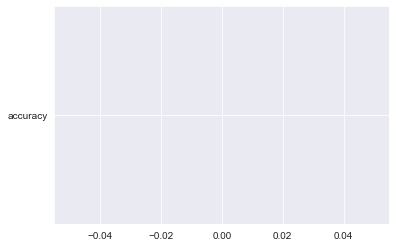

In [11]:
# Accuracy 
plt.plot(model.metrics_names[1])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [50]:
plt.plot(model.metrics_names[0])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

AttributeError: 'NoneType' object has no attribute 'history'